# Import libraries Here

In [1]:
pip install kneed

In [2]:
pip install minisom

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from minisom import MiniSom #import minisom library for SOM algorithm
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator

# UK

# Import Datasets

In [4]:
# UK Data reading into dataframe
UK_df = pd.read_csv(r"Training\UKfortraining1.csv")

# Dataset for tagging clusters to non normalised data for visualisation
non_normalised_UK_df = pd.read_csv(r"Training\UK_not_normalised.csv")

In [5]:
UK_df.head()

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
0,0.883721,0.000003,0.000057,7.600000,0.000008,0.880814,-4.243875
1,0.883721,0.000003,0.000057,7.600000,0.000008,0.880814,-4.243875
2,0.560465,0.000003,0.000072,1.275132,0.000056,0.105555,-4.144992
3,0.560465,0.000003,0.000072,1.275132,0.000056,0.105555,-4.144992
4,0.904651,0.000335,0.000604,9.487805,0.000064,0.977166,-3.218609


In [6]:
UK_df.describe()

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
count,104832.000000,1.048320e+05,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000
mean,0.347867,5.135877e-02,0.006132,0.649074,0.010188,-0.321131,-2.620909
std,0.155552,1.266455e-01,0.008169,0.878591,0.051103,0.370014,0.641548
min,0.001163,2.915452e-07,0.000030,0.001164,0.000008,-2.933993,-4.522343
25%,0.237209,1.078717e-04,0.000685,0.310976,0.002153,-0.507274,-3.164004
50%,0.344186,1.690962e-03,0.002240,0.524823,0.005020,-0.279987,-2.649688
75%,0.460465,3.294461e-02,0.008731,0.853448,0.011608,-0.068823,-2.058929
max,0.993023,1.000000e+00,0.110620,142.333333,7.758284,2.153307,-0.956166


# Creating Samples For Justification of Choice of Datasets Size

Create different sizes of data for the two dataset to run on KMEANS to justify choice of actual size of data used for training

## 2000 row sample

In [7]:
# Creating Sample Datasets for justification of choice of dataset sizing
UK_df_2k = UK_df.sample(n=2000,random_state=0)
UK_df_2k = UK_df_2k[['Porosity','Permeability']]
non_normalised_UK_df_2k = non_normalised_UK_df.sample(n=2000,random_state=0)

# reset index for both dataset
UK_df_2k = UK_df_2k.reset_index(drop=True)
non_normalised_UK_df_2k = non_normalised_UK_df_2k.reset_index(drop=True)

## 5000 row sample

In [8]:
# Creating Sample Datasets for justification of choice of dataset sizing
UK_df_5k = UK_df.sample(n=5000,random_state=0)
UK_df_5k = UK_df_5k[['Porosity','Permeability']]
non_normalised_UK_df_5k = non_normalised_UK_df.sample(n=5000,random_state=0)

# reset index for both dataset
UK_df_5k = UK_df_5k.reset_index(drop=True)
non_normalised_UK_df_5k = non_normalised_UK_df_5k.reset_index(drop=True)

## 10000 row sample

In [9]:
# Creating Sample Datasets for justification of choice of dataset sizing
UK_df_10k = UK_df.sample(n=10000,random_state=0)
UK_df_10k = UK_df_10k[['Porosity','Permeability']]
non_normalised_UK_df_10k = non_normalised_UK_df.sample(n=10000,random_state=0)

# reset index for both dataset
UK_df_10k = UK_df_10k.reset_index(drop=True)
non_normalised_UK_df_10k = non_normalised_UK_df_10k.reset_index(drop=True)

## 40000 row sample

In [10]:
# Creating Sample Datasets for justification of choice of dataset sizing
UK_df_40k = UK_df.sample(n=40000,random_state=0)
UK_df_40k = UK_df_40k[['Porosity','Permeability']]
non_normalised_UK_df_40k = non_normalised_UK_df.sample(n=40000,random_state=0)

# reset index for both dataset
UK_df_40k = UK_df_40k.reset_index(drop=True)
non_normalised_UK_df_40k = non_normalised_UK_df_40k.reset_index(drop=True)

## 80000 row sample

In [11]:
# Creating Sample Datasets for justification of choice of dataset sizing
UK_df_80k = UK_df.sample(n=80000,random_state=0)
UK_df_80k = UK_df_80k[['Porosity','Permeability']]
non_normalised_UK_df_80k = non_normalised_UK_df.sample(n=80000,random_state=0)

# reset index for both dataset
UK_df_80k = UK_df_80k.reset_index(drop=True)
non_normalised_UK_df_80k = non_normalised_UK_df_80k.reset_index(drop=True)

## Whole Dataset 

In [12]:
UK_df_full = UK_df[['Porosity','Permeability']]

# reset index for both dataset
UK_df_full = UK_df_full.reset_index(drop=True)
non_normalised_UK_df_full = non_normalised_UK_df.reset_index(drop=True)

# Train Samples on KMeans and Visualise For Comparision

## Find Optimal Clusters and Train KMeans for Each of the UK_df Datasets

### 2000 row sample

Text(0, 0.5, 'Inertia')

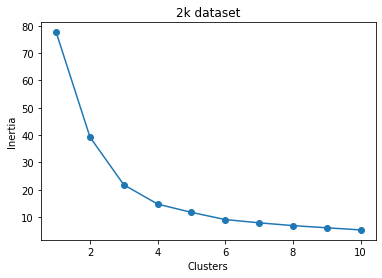

In [13]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i,random_state = 0)
    kmeans.fit(UK_df_2k)
    SSE.append(kmeans.inertia_)
    clusters.append(i)

plt.title('2k dataset')
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [14]:
# optimal cluster chosen is 4
kmeans_2k = KMeans(n_clusters=4, init='k-means++',random_state=0)
kmeans_2k.fit_predict(UK_df_2k)

array([1, 3, 3, ..., 0, 1, 3])

### 5000 row sample 

Text(0, 0.5, 'Inertia')

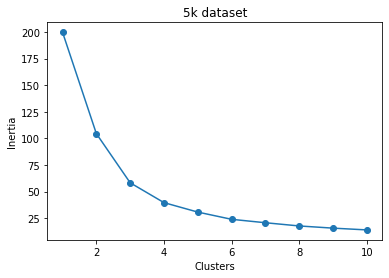

In [15]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i,random_state = 0)
    kmeans.fit(UK_df_5k)
    SSE.append(kmeans.inertia_)
    clusters.append(i)

plt.title('5k dataset')
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [16]:
# optimal cluster chosen is 4
kmeans_5k = KMeans(n_clusters=4, init='k-means++',random_state=0)
kmeans_5k.fit_predict(UK_df_5k)

array([3, 1, 1, ..., 3, 3, 1])

### 10000 row sample

Text(0, 0.5, 'Inertia')

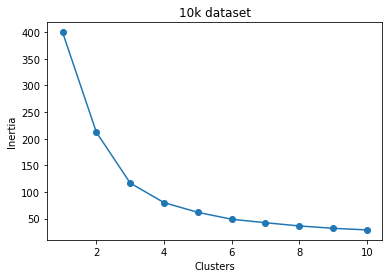

In [17]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i,random_state = 0)
    kmeans.fit(UK_df_10k)
    SSE.append(kmeans.inertia_)
    clusters.append(i)
    
plt.title('10k dataset')
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [18]:
# optimal cluster chosen is 4
kmeans_10k = KMeans(n_clusters=4, init='k-means++',random_state=0)
kmeans_10k.fit_predict(UK_df_10k)

array([2, 1, 1, ..., 2, 0, 1])

### 40000 row sample

Text(0, 0.5, 'Inertia')

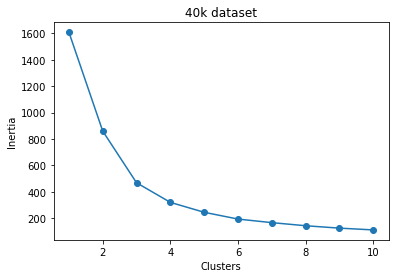

In [19]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i,random_state = 0)
    kmeans.fit(UK_df_40k)
    SSE.append(kmeans.inertia_)
    clusters.append(i)

plt.title('40k dataset')
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [20]:
# optimal cluster chosen is 4
kmeans_40k = KMeans(n_clusters=4, init='k-means++',random_state=0)
kmeans_40k.fit_predict(UK_df_40k)

array([3, 1, 1, ..., 0, 1, 0])

### 80000 row sample

Text(0, 0.5, 'Inertia')

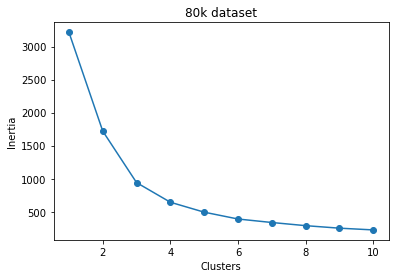

In [21]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i,random_state = 0)
    kmeans.fit(UK_df_80k)
    SSE.append(kmeans.inertia_)
    clusters.append(i)

plt.title('80k dataset')
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [22]:
# optimal cluster chosen is 4
kmeans_80k = KMeans(n_clusters=4, init='k-means++',random_state=0)
kmeans_80k.fit_predict(UK_df_80k)

array([2, 0, 0, ..., 2, 2, 2])

### whole dataset

Text(0, 0.5, 'Inertia')

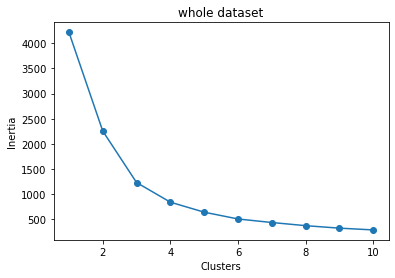

In [23]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i,random_state = 0)
    kmeans.fit(UK_df_full)
    SSE.append(kmeans.inertia_)
    clusters.append(i)

plt.title('whole dataset')
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [24]:
# optimal cluster chosen is 4
kmeans_full = KMeans(n_clusters=4, init='k-means++',random_state=0)
kmeans_full.fit_predict(UK_df_full)

array([0, 0, 0, ..., 1, 1, 1])

## Generate Visualisation for Comparison

In [25]:
# Tag clusters to the un-normalised data
# + 1 to make clusters start at 1

# 2000 row dataset
non_normalised_UK_df_2k['clusters'] = kmeans_2k.labels_
non_normalised_UK_df_2k['clusters'] = non_normalised_UK_df_2k['clusters'] + 1

# 5000 row dataset
non_normalised_UK_df_5k['clusters'] = kmeans_5k.labels_
non_normalised_UK_df_5k['clusters'] = non_normalised_UK_df_5k['clusters'] + 1

# 10000 row dataset
non_normalised_UK_df_10k['clusters'] = kmeans_10k.labels_
non_normalised_UK_df_10k['clusters'] = non_normalised_UK_df_10k['clusters'] + 1

# 40000 row dataset
non_normalised_UK_df_40k['clusters'] = kmeans_40k.labels_
non_normalised_UK_df_40k['clusters'] = non_normalised_UK_df_40k['clusters'] + 1

# 80000 row dataset
non_normalised_UK_df_80k['clusters'] = kmeans_80k.labels_
non_normalised_UK_df_80k['clusters'] = non_normalised_UK_df_80k['clusters'] + 1

# whole dataset
non_normalised_UK_df_full['clusters'] = kmeans_full.labels_
non_normalised_UK_df_full['clusters'] = non_normalised_UK_df_full['clusters'] + 1

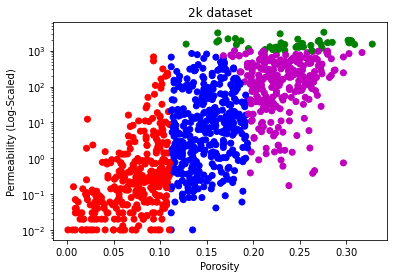

In [26]:
# 2000 row dataset

# Tag color scheme to each of the cluster
non_normalised_UK_df_2k['c'] = non_normalised_UK_df_2k.clusters.map({1:'r', 2:'b',3:'g', 4:'m'})

# generate 1k samples for visualisation
non_normalised_UK_df_2k = non_normalised_UK_df_2k.sample(n=1000)

# plot chart 
plt.yscale('log')
plt.scatter(x=non_normalised_UK_df_2k['Porosity'],y=non_normalised_UK_df_2k['Permeability'],c=non_normalised_UK_df_2k['c'])
plt.title('2k dataset')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

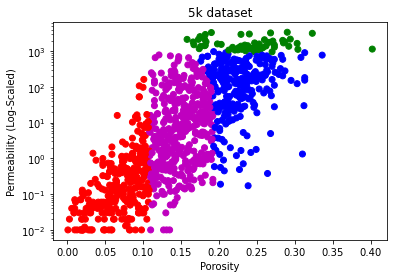

In [27]:
# 5000 row dataset

# Tag color scheme to each of the cluster
non_normalised_UK_df_5k['c'] = non_normalised_UK_df_5k.clusters.map({1:'r', 2:'b',3:'g', 4:'m'})

# generate 1k samples for visualisation
non_normalised_UK_df_5k = non_normalised_UK_df_5k.sample(n=1000)

# plot chart 
plt.yscale('log')
plt.scatter(x=non_normalised_UK_df_5k['Porosity'],y=non_normalised_UK_df_5k['Permeability'],c=non_normalised_UK_df_5k['c'])
plt.title('5k dataset')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

In [28]:
non_normalised_UK_df_5k.head()

,Porosity,Permeability,clusters,c
655,0.056,0.08,1,r
4936,0.065,0.23,1,r
3372,0.120,2.67,4,m
3958,0.082,0.02,1,r
214,0.119,18.00,4,m


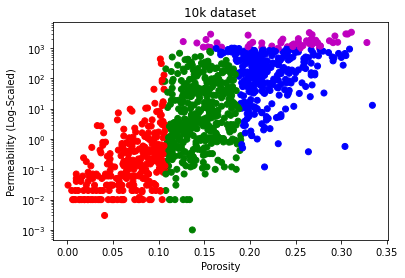

In [29]:
# 10000 row dataset

# Tag color scheme to each of the cluster
non_normalised_UK_df_10k['c'] = non_normalised_UK_df_10k.clusters.map({1:'r', 2:'b',3:'g', 4:'m'})

# generate 1k samples for visualisation
non_normalised_UK_df_10k = non_normalised_UK_df_10k.sample(n=1000)

# plot chart 
plt.yscale('log')
plt.scatter(x=non_normalised_UK_df_10k['Porosity'],y=non_normalised_UK_df_10k['Permeability'],c=non_normalised_UK_df_10k['c'])
plt.title('10k dataset')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

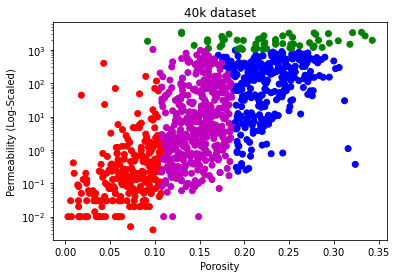

In [30]:
# 40000 row dataset

# Tag color scheme to each of the cluster
non_normalised_UK_df_40k['c'] = non_normalised_UK_df_40k.clusters.map({1:'r', 2:'b',3:'g', 4:'m'})

# generate 1k samples for visualisation
non_normalised_UK_df_40k = non_normalised_UK_df_40k.sample(n=1000)

# plot chart 
plt.yscale('log')
plt.scatter(x=non_normalised_UK_df_40k['Porosity'],y=non_normalised_UK_df_40k['Permeability'],c=non_normalised_UK_df_40k['c'])
plt.title('40k dataset')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

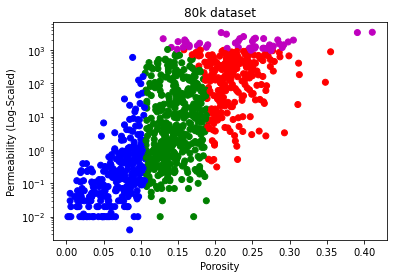

In [31]:
# 80000 row dataset

# Tag color scheme to each of the cluster
non_normalised_UK_df_80k['c'] = non_normalised_UK_df_80k.clusters.map({1:'r', 2:'b',3:'g', 4:'m'})

# generate 1k samples for visualisation
non_normalised_UK_df_80k = non_normalised_UK_df_80k.sample(n=1000)

# plot chart 
plt.yscale('log')
plt.scatter(x=non_normalised_UK_df_80k['Porosity'],y=non_normalised_UK_df_80k['Permeability'],c=non_normalised_UK_df_80k['c'])
plt.title('80k dataset')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

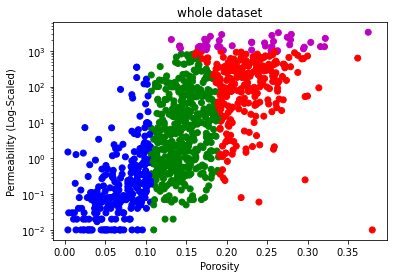

In [32]:
# whole dataset

# Tag color scheme to each of the cluster
non_normalised_UK_df_full['c'] = non_normalised_UK_df_full.clusters.map({1:'r', 2:'b',3:'g', 4:'m'})

# generate 1k samples for visualisation
non_normalised_UK_df_full = non_normalised_UK_df_full.sample(n=1000)

# plot chart 
plt.yscale('log')
plt.scatter(x=non_normalised_UK_df_full['Porosity'],y=non_normalised_UK_df_full['Permeability'],c=non_normalised_UK_df_full['c'])
plt.title('whole dataset')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

# Creation of Datasets for Model Training

In [33]:
# For model training using datasets with 2000 rows
UK_df = UK_df.sample(n=2000,random_state=0)
UK_df = UK_df.sort_values(by='FZI')

# Tagging clusters to non normalised data for visualisation
non_normalised_UK_df = non_normalised_UK_df.sample(n=2000,random_state=0)

# Reorder non_normalised_UK_df to follow UK_df
non_normalised_UK_df = non_normalised_UK_df.reindex(list(UK_df.index))

# Reset index for both dataset
UK_df = UK_df.reset_index(drop=True)
non_normalised_UK_df = non_normalised_UK_df.reset_index(drop=True)

# Sample set for predicting permeability and plotting of residual models
UK_df_sample_set = UK_df.sample(n=50,random_state=0)
UK_df_sample_set = UK_df_sample_set.reset_index(drop=True)

UK_df_sample_set_traditional = UK_df_sample_set.copy()

In [34]:
UK_df

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
0,0.318605,2.915452e-07,0.000030,0.467577,0.000064,-0.330147,-4.522343
1,0.769767,1.049563e-04,0.000367,3.343434,0.000110,0.524193,-3.435746
2,0.613953,4.081633e-05,0.000256,1.590361,0.000161,0.201496,-3.591721
3,0.993023,7.921283e-01,0.028044,142.333333,0.000197,2.153307,-1.552152
4,0.313953,2.915452e-06,0.000096,0.457627,0.000209,-0.339488,-4.019150
...,...,...,...,...,...,...,...
1995,0.009302,1.166181e-05,0.001112,0.009390,0.118404,-2.027350,-2.953983
1996,0.016279,1.020408e-04,0.002486,0.016548,0.150226,-1.781242,-2.604498
1997,0.051163,3.586006e-03,0.008313,0.053922,0.154168,-1.268237,-2.080242
1998,0.041860,1.282799e-02,0.017382,0.043689,0.397861,-1.359625,-1.759893


<AxesSubplot:xlabel='Porosity', ylabel='Permeability'>

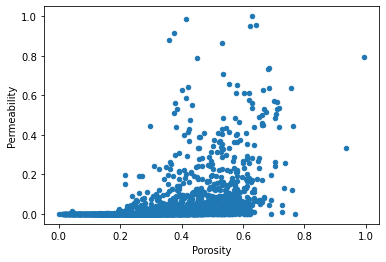

In [35]:
UK_df.plot.scatter(x = 'Porosity',y = 'Permeability',\
                            xlabel = 'Porosity', ylabel = 'Permeability')

In [36]:
non_normalised_UK_df

,Porosity,Permeability
0,0.137,0.001
1,0.331,0.360
2,0.264,0.140
3,0.427,2717.000
4,0.135,0.010
...,...,...
1995,0.004,0.040
1996,0.007,0.350
1997,0.022,12.300
1998,0.018,44.000


In [37]:
UK_df_sample_set

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
0,0.448837,0.000933,0.001432,0.814346,0.001758,-0.089191,-2.844187
1,0.453488,0.014286,0.005573,0.829787,0.006716,-0.081033,-2.253902
2,0.123256,0.000087,0.000836,0.140584,0.005950,-0.852065,-3.077560
3,0.390698,0.001633,0.002030,0.641221,0.003166,-0.192992,-2.692544
4,0.381395,0.052478,0.011647,0.616541,0.018892,-0.210038,-1.933769
5,0.376744,0.006006,0.003965,0.604478,0.006559,-0.218620,-2.401807
6,0.274419,0.005539,0.004461,0.378205,0.011796,-0.422273,-2.350547
7,0.704651,0.262391,0.019161,2.385827,0.008031,0.377639,-1.717583
8,0.283721,0.029155,0.010066,0.396104,0.025411,-0.402191,-1.997163
9,0.339535,0.000012,0.000184,0.514085,0.000358,-0.288965,-3.735130


In [38]:
non_normalised_UK_df

,Porosity,Permeability
0,0.137,0.001
1,0.331,0.360
2,0.264,0.140
3,0.427,2717.000
4,0.135,0.010
...,...,...
1995,0.004,0.040
1996,0.007,0.350
1997,0.022,12.300
1998,0.018,44.000


In [39]:
# View the top few rows
non_normalised_UK_df.head

<bound method NDFrame.head of       Porosity  Permeability
0        0.137         0.001
1        0.331         0.360
2        0.264         0.140
3        0.427      2717.000
4        0.135         0.010
...        ...           ...
1995     0.004         0.040
1996     0.007         0.350
1997     0.022        12.300
1998     0.018        44.000
1999     0.001         0.010

[2000 rows x 2 columns]>

In [40]:
UK_df.describe()

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.344795,4.720134e-02,0.005863,0.707340,0.009459,-0.328711,-2.640645
std,0.157991,1.178592e-01,0.007785,3.216929,0.018327,0.378641,0.643223
min,0.002326,2.915452e-07,0.000030,0.002331,0.000064,-2.632457,-4.522343
25%,0.227907,9.329446e-05,0.000644,0.295181,0.002114,-0.529912,-3.190851
50%,0.339535,1.545190e-03,0.002159,0.514085,0.004933,-0.288965,-2.665696
75%,0.460465,3.381924e-02,0.008858,0.853448,0.011312,-0.068823,-2.052658
max,0.993023,1.000000e+00,0.049091,142.333333,0.476951,2.153307,-1.309002


In [41]:
UK_df.shape

(2000, 7)

iterative multi linear regression to determine optimal number of clusters

In [42]:
UK_fzi_rqi_df = UK_df
UK_fzi_rqi_df_non_normalised = non_normalised_UK_df.copy()
#UK_fzi_rqi_df['Log Porosity Index'] = np.log10(UK_fzi_rqi_df['Porosity Index'])
#UK_fzi_rqi_df['Log RQI'] = np.log10(UK_fzi_rqi_df['RQI'])
#UK_fzi_rqi_df= UK_fzi_rqi_df[~UK_fzi_rqi_df.isin([np.inf, -np.inf]).any(1)] # rows removing infinity values
#UK_fzi_rqi_df = UK_fzi_rqi_df.reset_index(drop=True)

In [43]:
print(UK_fzi_rqi_df.head())

   Porosity  Permeability       RQI  Porosity Index       FZI  \
0  0.318605  2.915452e-07  0.000030        0.467577  0.000064   
1  0.769767  1.049563e-04  0.000367        3.343434  0.000110   
2  0.613953  4.081633e-05  0.000256        1.590361  0.000161   
3  0.993023  7.921283e-01  0.028044      142.333333  0.000197   
4  0.313953  2.915452e-06  0.000096        0.457627  0.000209   

   Log Porosity Index   Log RQI  
0           -0.330147 -4.522343  
1            0.524193 -3.435746  
2            0.201496 -3.591721  
3            2.153307 -1.552152  
4           -0.339488 -4.019150  


In [44]:
UK_fzi_rqi_df.describe()

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.344795,4.720134e-02,0.005863,0.707340,0.009459,-0.328711,-2.640645
std,0.157991,1.178592e-01,0.007785,3.216929,0.018327,0.378641,0.643223
min,0.002326,2.915452e-07,0.000030,0.002331,0.000064,-2.632457,-4.522343
25%,0.227907,9.329446e-05,0.000644,0.295181,0.002114,-0.529912,-3.190851
50%,0.339535,1.545190e-03,0.002159,0.514085,0.004933,-0.288965,-2.665696
75%,0.460465,3.381924e-02,0.008858,0.853448,0.011312,-0.068823,-2.052658
max,0.993023,1.000000e+00,0.049091,142.333333,0.476951,2.153307,-1.309002


In [45]:
UK_fzi_rqi_df.shape

(2000, 7)

<AxesSubplot:xlabel='Log Porosity Index', ylabel='Log RQI'>

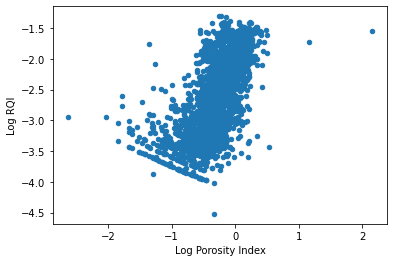

In [46]:
UK_fzi_rqi_df.plot.scatter(x = 'Log Porosity Index',y = 'Log RQI')

In [47]:
UK_fzi_rqi_df.isnull().sum()

Porosity              0
Permeability          0
RQI                   0
Porosity Index        0
FZI                   0
Log Porosity Index    0
Log RQI               0
dtype: int64

In [48]:
np.isinf(UK_fzi_rqi_df).values.sum()

0

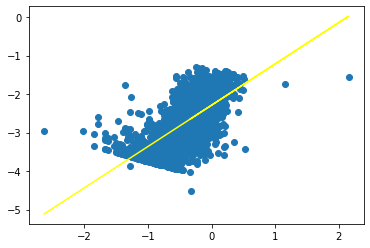

In [49]:
x = UK_fzi_rqi_df['Log Porosity Index'].values.reshape(-1,1)
y = UK_fzi_rqi_df['Log RQI'].values.reshape(-1,1)
lr = LinearRegression().fit(x,y)
predicted_y = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,predicted_y,color='yellow')
plt.show()

In [50]:
print(len(UK_fzi_rqi_df))

2000


In [51]:
r2_score(y,predicted_y) 

0.3985412237370233

In [52]:
clusters = []
r2 = []

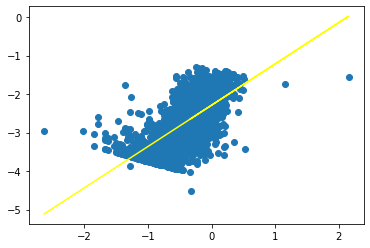

In [53]:
clusters = []
r2 = []

#plot the log RQI vs normalised porosity
x = UK_fzi_rqi_df['Log Porosity Index'].values.reshape(-1,1)
y = UK_fzi_rqi_df['Log RQI'].values.reshape(-1,1)
lr = LinearRegression().fit(x,y)
predicted_y = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,predicted_y,color='yellow')
plt.show()
clusters.append(1)
r2.append(r2_score(y,predicted_y))

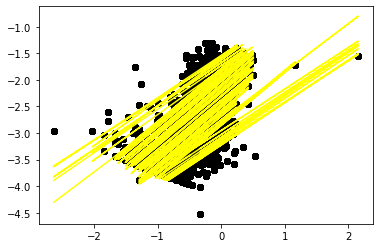

In [54]:
temp_r2 = []

#looping cluster numbers to find the r-square for the linear regression of the log RQI vs normalised porosity plot
num_cluster = 10
for i in range(num_cluster):    
    
    if(i>0): # skips for 1 cluster as it has been done
        #print(int(len(UK_fzi_rqi_df)/(i+1))) # approximate whole number of rows each plot should have when number of cluster change
        #set up the scatter plot with no regression line each time
        x = UK_fzi_rqi_df['Log Porosity Index'].values.reshape(-1,1)
        y = UK_fzi_rqi_df['Log RQI'].values.reshape(-1,1)
        lr = LinearRegression().fit(x,y)
        plt.scatter(x,y,c='black')
        for a in range(i+1):#segregate dataframe rows somewhat evenly with fzi sorted to ascending for regression plotting
            if(a+1 != num_cluster):
            #print(UK_fzi_rqi_df.iloc[int(len(UK_fzi_rqi_df)/(i+1))*a:int(len(UK_fzi_rqi_df)/(i+1))*(a+1)])
                partial_df = UK_fzi_rqi_df.iloc[int(len(UK_fzi_rqi_df)/(i+1))*a:int(len(UK_fzi_rqi_df)/(i+1))*(a+1)]
                sub_x = partial_df['Log Porosity Index'].values.reshape(-1,1)
                sub_y = partial_df['Log RQI'].values.reshape(-1,1)
                lr = LinearRegression().fit(sub_x,sub_y)
                predicted_sub_y = lr.predict(sub_x)
                plt.plot(sub_x,predicted_sub_y,color='yellow')
                temp_r2.append(r2_score(sub_y,predicted_sub_y))
            else:
                partial_df = UK_fzi_rqi_df.iloc[int(len(UK_fzi_rqi_df)/(i+1))*a:len(UK_fzi_rqi_df)+1]
                sub_x = partial_df['Log Porosity Index'].values.reshape(-1,1)
                sub_y = partial_df['Log RQI'].values.reshape(-1,1)
                lr = LinearRegression().fit(sub_x,sub_y)
                predicted_sub_y = lr.predict(sub_x)
                plt.plot(sub_x,predicted_sub_y,color='yellow')
                temp_r2.append(r2_score(sub_y,predicted_sub_y))
        mean_r2 = sum(temp_r2)/len(temp_r2) # get aveage r squared 
        clusters.append(i+1)
        r2.append(mean_r2)
        #plt.show()

In [55]:
print(clusters)
print(r2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.3985412237370233, 0.5713951404419476, 0.6494982500598441, 0.709489644523392, 0.7549793927505635, 0.7910599094416129, 0.8187193419955697, 0.8382396019512472, 0.8552861627522915, 0.8691236026980858]


Text(0.5, 0, 'number of cluster')

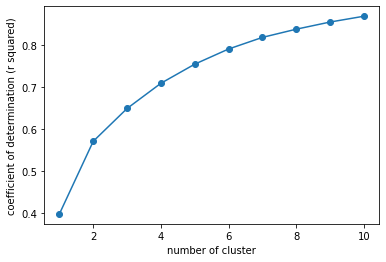

In [56]:
plt.plot(clusters,r2, marker='o')
plt.ylabel('coefficient of determination (r squared)')
plt.xlabel('number of cluster')

Optimal number of hfu/cluster is 6

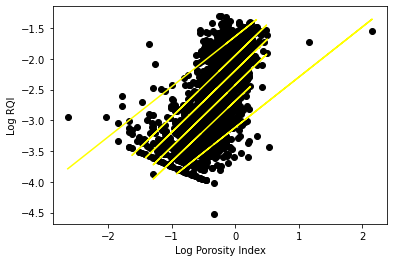

In [57]:
# perform the traditional method optimal cluster = 6 
FZI_RQI_cLuster_statistics = pd.DataFrame()

optimal_cluster = 6

for i in range(optimal_cluster):    
    
    if(i+1==optimal_cluster): # skips alll loops until it reaches optimal number
        #set up the scatter plot with no regression line each time
        x = UK_fzi_rqi_df['Log Porosity Index'].values.reshape(-1,1)
        y = UK_fzi_rqi_df['Log RQI'].values.reshape(-1,1)
        plt.scatter(x,y,c='black')
        plt.ylabel('Log RQI')
        plt.xlabel('Log Porosity Index')
        for a in range(optimal_cluster):#segregate dataframe rows somewhat evenly with fzi sorted to ascending 
                if(a+1 != optimal_cluster):
                    partial_df = UK_fzi_rqi_df.iloc[int(len(UK_fzi_rqi_df)/(optimal_cluster))*a:int(len(UK_fzi_rqi_df)/(optimal_cluster))*(a+1)]
                    # update the clusters into the dataset  
                    UK_fzi_rqi_df_non_normalised.loc[list(range(int(len(UK_fzi_rqi_df)/(optimal_cluster))*a,int(len(UK_fzi_rqi_df)/(optimal_cluster))*(a+1))),'Cluster'] = a+1
                    sub_x = partial_df['Log Porosity Index'].values.reshape(-1,1)
                    sub_y = partial_df['Log RQI'].values.reshape(-1,1)
                    lr = LinearRegression().fit(sub_x,sub_y)
                    predicted_sub_y = lr.predict(sub_x)
                    plt.plot(sub_x,predicted_sub_y,color='yellow')
                    FZI_RQI_cLuster_statistics = pd.concat([FZI_RQI_cLuster_statistics,partial_df[['Porosity',\
                                                                  'Permeability']].mean()],axis=1)
                    # create upper lower fzi bound for the partial df
                    max_fzi = partial_df['FZI'].max()
                    min_fzi = partial_df['FZI'].min()
                    
                    # predict Log RQI
                    for one_sample in range(len(UK_df_sample_set_traditional)): 
                        if(UK_df_sample_set_traditional.loc[one_sample]['FZI'] >= min_fzi and \
                            UK_df_sample_set_traditional.loc[one_sample]['FZI'] <= max_fzi):
                            predicted_sample_logrqi = lr.predict(UK_df_sample_set_traditional.loc[one_sample]['Log Porosity Index'].reshape(-1,1))
                            UK_df_sample_set_traditional.loc[one_sample,'Predicted Log RQI'] = predicted_sample_logrqi
     
                          
                else: # if a+1 == optimal_cluster 
                    partial_df = UK_fzi_rqi_df.iloc[int(len(UK_fzi_rqi_df)/(optimal_cluster))*a:len(UK_fzi_rqi_df)+1]
                    # update the clusters into the dataset  
                    UK_fzi_rqi_df_non_normalised.loc[list(range(int(len(UK_fzi_rqi_df)/(optimal_cluster))*a,len(UK_fzi_rqi_df+1))),'Cluster'] = a+1
                    sub_x = partial_df['Log Porosity Index'].values.reshape(-1,1)
                    sub_y = partial_df['Log RQI'].values.reshape(-1,1)
                    lr = LinearRegression().fit(sub_x,sub_y)
                    predicted_sub_y = lr.predict(sub_x)
                    plt.plot(sub_x,predicted_sub_y,color='yellow')
                    FZI_RQI_cLuster_statistics = pd.concat([FZI_RQI_cLuster_statistics,partial_df[['Porosity',\
                                                                  'Permeability']].mean()],axis=1)
                    # create upper lower fzi bound for the partial df
                    max_fzi = partial_df['FZI'].max()
                    min_fzi = partial_df['FZI'].min()
                    
                    # predict Log RQI
                    for one_sample in range(len(UK_df_sample_set)): 
                        if(UK_df_sample_set_traditional.loc[one_sample]['FZI'] >= min_fzi and \
                           UK_df_sample_set_traditional.loc[one_sample]['FZI'] <= max_fzi):
                            predicted_sample_logrqi = lr.predict(UK_df_sample_set_traditional.loc[one_sample]['Log Porosity Index'].reshape(-1,1))
                            UK_df_sample_set_traditional.loc[one_sample,'Predicted Log RQI'] = predicted_sample_logrqi

UK_fzi_rqi_df_non_normalised = UK_fzi_rqi_df_non_normalised.astype({'Cluster':'int'})

In [58]:
# Reverse calculate to derive predicted permeablity
UK_df_sample_set_traditional['Predicted RQI'] = 10**UK_df_sample_set_traditional['Predicted Log RQI']
UK_df_sample_set_traditional['Predicted Permeability'] = ((UK_df_sample_set_traditional['Predicted RQI']/0.0314)**2)*UK_df_sample_set_traditional['Porosity']

In [59]:
# Get residual
UK_df_sample_set_traditional['Residuals'] = UK_df_sample_set_traditional['Permeability'] - UK_df_sample_set_traditional['Predicted Permeability']

In [60]:
UK_df_sample_set_traditional = UK_df_sample_set_traditional.sort_values(by='Porosity')

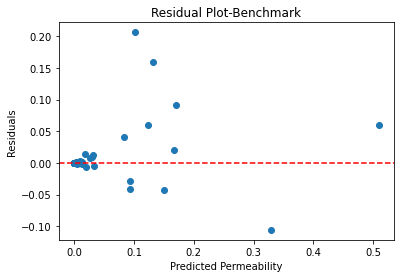

In [61]:
# Plot residual plot
plt.scatter(y=UK_df_sample_set_traditional['Residuals'],x=UK_df_sample_set_traditional['Predicted Permeability'])
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Plot-Benchmark')
plt.xlabel('Predicted Permeability')
plt.ylabel('Residuals')
plt.show()

In [62]:
# Get cluster summary
FZI_RQI_cLuster_stats = UK_fzi_rqi_df_non_normalised[['Porosity', 'Permeability', 'Cluster']]
FZI_RQI_cLuster_stats['c'] = FZI_RQI_cLuster_stats.Cluster.map({1:'r', 2:'b',3:'g', 4:'m', 5:'y', 6:'k'})
FZI_RQI_cLuster_summary = FZI_RQI_cLuster_stats.groupby(by='Cluster').mean()

In [63]:
FZI_RQI_cLuster_summary.round(3)

,Porosity,Permeability
Cluster,,
1,0.138,12.175
2,0.120,1.888
3,0.140,16.426
4,0.157,68.599
5,0.181,278.419
6,0.154,591.318


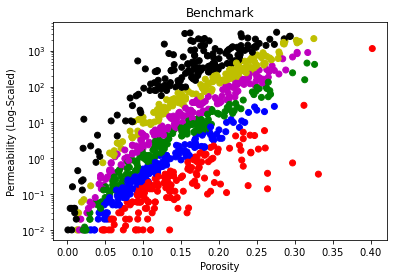

In [64]:
# Plot porosity vs log-scaled permeability scatterplot 
temp = FZI_RQI_cLuster_stats.copy()
temp = temp.sample(n=1000,random_state =0)

plt.yscale('log')
plt.scatter(x=temp['Porosity'],y=temp['Permeability'],c=temp['c'])
plt.title('Benchmark')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()


Kmeans

In [65]:
UK_df.head()

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
0,0.318605,2.915452e-07,0.000030,0.467577,0.000064,-0.330147,-4.522343
1,0.769767,1.049563e-04,0.000367,3.343434,0.000110,0.524193,-3.435746
2,0.613953,4.081633e-05,0.000256,1.590361,0.000161,0.201496,-3.591721
3,0.993023,7.921283e-01,0.028044,142.333333,0.000197,2.153307,-1.552152
4,0.313953,2.915452e-06,0.000096,0.457627,0.000209,-0.339488,-4.019150


In [66]:
UK_df_sample_set.head()

,Porosity,Permeability,RQI,Porosity Index,FZI,Log Porosity Index,Log RQI
0,0.448837,0.000933,0.001432,0.814346,0.001758,-0.089191,-2.844187
1,0.453488,0.014286,0.005573,0.829787,0.006716,-0.081033,-2.253902
2,0.123256,0.000087,0.000836,0.140584,0.005950,-0.852065,-3.077560
3,0.390698,0.001633,0.002030,0.641221,0.003166,-0.192992,-2.692544
4,0.381395,0.052478,0.011647,0.616541,0.018892,-0.210038,-1.933769


# Data Preperation for model training

In [67]:
# Select the original columns
UK_df = UK_df[['Porosity','Permeability']]
UK_df_sample_set = UK_df_sample_set[['Porosity','Permeability']]

In [68]:
# Compare shape of the data to the one used for the modified traditional method
UK_df.shape

(2000, 2)

# K-Means 

In [69]:
UK_df.describe()

,Porosity,Permeability
count,2000.000000,2.000000e+03
mean,0.344795,4.720134e-02
std,0.157991,1.178592e-01
min,0.002326,2.915452e-07
25%,0.227907,9.329446e-05
50%,0.339535,1.545190e-03
75%,0.460465,3.381924e-02
max,0.993023,1.000000e+00


Text(0, 0.5, 'Inertia')

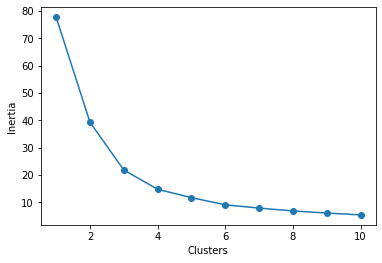

In [70]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i,random_state = 0)
    kmeans.fit(UK_df)
    SSE.append(kmeans.inertia_)
    clusters.append(i)
    
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [71]:
# optimal cluster chosen is 3
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
kmeans.fit_predict(UK_df)

array([0, 1, 1, ..., 0, 0, 0])

In [72]:
silhouette_score(UK_df, kmeans.labels_)

0.5285214879243524

In [73]:
calinski_harabasz_score(UK_df, kmeans.labels_)

2556.740453994207

In [74]:
davies_bouldin_score(UK_df, kmeans.labels_)

0.6420486264016403

In [75]:
# For sample dataset permebility prediction and residual model
UK_df_kmeans_train = UK_df.copy()
UK_df_kmeans_train ['clusters'] = kmeans.labels_
UK_df_kmeans_train ['clusters'] = UK_df_kmeans_train ['clusters'] + 1

# For plotting of charts and statistics overview
UK_df_kmeans_non_normalised = non_normalised_UK_df.copy()
UK_df_kmeans_non_normalised['clusters'] = kmeans.labels_
UK_df_kmeans_non_normalised['clusters'] = UK_df_kmeans_non_normalised['clusters'] + 1

In [76]:
print(UK_df_kmeans_non_normalised)

      Porosity  Permeability  clusters
0        0.137         0.001         1
1        0.331         0.360         2
2        0.264         0.140         2
3        0.427      2717.000         3
4        0.135         0.010         1
...        ...           ...       ...
1995     0.004         0.040         1
1996     0.007         0.350         1
1997     0.022        12.300         1
1998     0.018        44.000         1
1999     0.001         0.010         1

[2000 rows x 3 columns]


In [77]:
UK_df_kmeans_non_normalised.describe()

,Porosity,Permeability,clusters
count,2000.000000,2000.000000,2000.000000
mean,0.148262,161.900589,1.549500
std,0.067936,404.257159,0.597267
min,0.001000,0.001000,1.000000
25%,0.098000,0.320000,1.000000
50%,0.146000,5.300000,1.000000
75%,0.198000,116.000000,2.000000
max,0.427000,3430.000000,3.000000


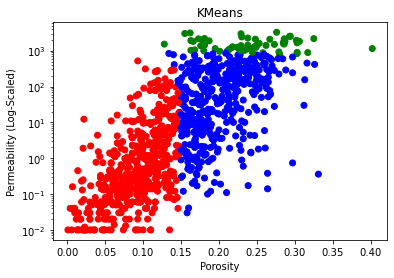

In [78]:
# Plot porosity vs log-scaled permeability scatterplot 
UK_df_kmeans_non_normalised['c'] = UK_df_kmeans_non_normalised.clusters.map({1:'r', 2:'b',3:'g', 4:'m', 5:'y', 6:'k'})

temp_UK_df_kmeans = UK_df_kmeans_non_normalised.copy()
temp_UK_df_kmeans = temp_UK_df_kmeans.sample(n=1000,random_state=0)

plt.yscale('log')
plt.scatter(x=temp_UK_df_kmeans['Porosity'],y=temp_UK_df_kmeans['Permeability'],c=temp_UK_df_kmeans['c'])
plt.title('KMeans')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

In [79]:
# The means for the dataset features of each cluster
UK_df_kmeans_non_normalised = UK_df_kmeans_non_normalised.groupby(by='clusters').mean()

In [80]:
UK_df_kmeans_non_normalised.round(3)

,Porosity,Permeability
clusters,,
1,0.093,15.225
2,0.200,152.504
3,0.243,1596.954


In [81]:
UK_df_kmeans_train.describe()

,Porosity,Permeability,clusters
count,2000.000000,2.000000e+03,2000.000000
mean,0.344795,4.720134e-02,1.549500
std,0.157991,1.178592e-01,0.597267
min,0.002326,2.915452e-07,1.000000
25%,0.227907,9.329446e-05,1.000000
50%,0.339535,1.545190e-03,1.000000
75%,0.460465,3.381924e-02,2.000000
max,0.993023,1.000000e+00,3.000000


In [82]:
# Segregation of data by clusters for equation/line fitting
kmeans_cluster_1 = UK_df_kmeans_train[UK_df_kmeans_train['clusters'] == 1]
kmeans_cluster_2 = UK_df_kmeans_train[UK_df_kmeans_train['clusters'] == 2]
kmeans_cluster_3 = UK_df_kmeans_train[UK_df_kmeans_train['clusters'] == 3]

# Select only the relevant columns
kmeans_cluster_1 = kmeans_cluster_1[['Porosity','Permeability']]
kmeans_cluster_2 = kmeans_cluster_2[['Porosity','Permeability']]
kmeans_cluster_3 = kmeans_cluster_3[['Porosity','Permeability']]

# Fit a Linear regression line for each cluster
kmeans_cluster_1_x = kmeans_cluster_1['Porosity'].values.reshape(-1,1)
kmeans_cluster_1_y = kmeans_cluster_1['Permeability'].values.reshape(-1,1)
kmeans_cluster_1_lr = LinearRegression().fit(kmeans_cluster_1_x,kmeans_cluster_1_y)

kmeans_cluster_2_x = kmeans_cluster_2['Porosity'].values.reshape(-1,1)
kmeans_cluster_2_y = kmeans_cluster_2['Permeability'].values.reshape(-1,1)
kmeans_cluster_2_lr = LinearRegression().fit(kmeans_cluster_2_x,kmeans_cluster_2_y)

kmeans_cluster_3_x = kmeans_cluster_3['Porosity'].values.reshape(-1,1)
kmeans_cluster_3_y = kmeans_cluster_3['Permeability'].values.reshape(-1,1)
kmeans_cluster_3_lr = LinearRegression().fit(kmeans_cluster_3_x,kmeans_cluster_3_y)

In [83]:
# copy sample set for testing
UK_df_sample_set_kmeans = UK_df_sample_set.copy()

In [84]:
# Predict clusters of sample set and tag cluster back to testing set
predicted_cluster = kmeans.predict(UK_df_sample_set_kmeans)
UK_df_sample_set_kmeans['Predicted Cluster'] = predicted_cluster+1

In [85]:
# predict permeability 
for one_sample in range(len(UK_df_sample_set_kmeans)):
    if(UK_df_sample_set_kmeans.loc[one_sample]['Predicted Cluster'] == 1):
        predicted_permeability = kmeans_cluster_1_lr.predict(UK_df_sample_set_kmeans.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_kmeans.loc[one_sample]['Predicted Cluster'] == 2):
        predicted_permeability = kmeans_cluster_2_lr.predict(UK_df_sample_set_kmeans.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_kmeans.loc[one_sample]['Predicted Cluster'] == 3):
        predicted_permeability = kmeans_cluster_3_lr.predict(UK_df_sample_set_kmeans.loc[one_sample]['Porosity'].reshape(-1,1))
    UK_df_sample_set_kmeans.loc[one_sample,'Predicted Permeability'] = float(predicted_permeability)

In [86]:
# Residual Calculation
UK_df_sample_set_kmeans['Residuals'] = UK_df_sample_set_kmeans['Permeability'] - UK_df_sample_set_kmeans['Predicted Permeability']

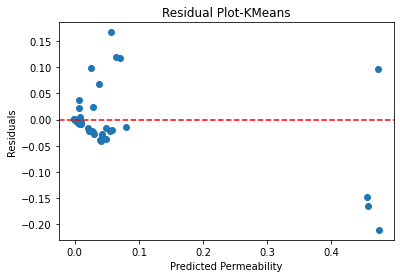

In [87]:
# plot residual plot
plt.scatter(y=UK_df_sample_set_kmeans['Residuals'],x=UK_df_sample_set_kmeans['Predicted Permeability'])
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Plot-KMeans')
plt.xlabel('Predicted Permeability')
plt.ylabel('Residuals')
plt.show()

# Self Organising Map (SOM)

In [88]:
UK_df

,Porosity,Permeability
0,0.318605,2.915452e-07
1,0.769767,1.049563e-04
2,0.613953,4.081633e-05
3,0.993023,7.921283e-01
4,0.313953,2.915452e-06
...,...,...
1995,0.009302,1.166181e-05
1996,0.016279,1.020408e-04
1997,0.051163,3.586006e-03
1998,0.041860,1.282799e-02


In [89]:
som = MiniSom(x=10 , y=10 , input_len = 4 , sigma = 1.0, learning_rate = 0.5) # sigma and learning rate are default values

In [90]:
UK_df.head()

,Porosity,Permeability
0,0.318605,2.915452e-07
1,0.769767,1.049563e-04
2,0.613953,4.081633e-05
3,0.993023,7.921283e-01
4,0.313953,2.915452e-06


In [91]:
data = UK_df.values

In [92]:
data

array([[3.18604651e-01, 2.91545190e-07],
       [7.69767442e-01, 1.04956268e-04],
       [6.13953488e-01, 4.08163265e-05],
       ...,
       [5.11627907e-02, 3.58600583e-03],
       [4.18604651e-02, 1.28279883e-02],
       [2.32558140e-03, 2.91545190e-06]])

# Training SOM

In [93]:
# Initialise and train
som_grid = (10,10)
som = MiniSom(x=som_grid[0] , y=som_grid[1] , input_len = data.shape[1] , sigma = 1.0, learning_rate = 0.5,random_seed=5,\
              neighborhood_function = 'gaussian')
som.train(data,100000)

In [94]:
data[0]

array([3.18604651e-01, 2.91545190e-07])

In [95]:
len(data)

2000

In [96]:
som.winner(data[0])

(9, 6)

In [97]:
# find winner neuron locations for all samples
for i in range(len(data)):
    #print(type(count))
    #print(count)
    if i == 0:
        merged = pd.DataFrame([[som.winner(data[0])[0],som.winner(data[0])[1]]],columns = ['axis_a','axis_b'])
    else: 
        df2 = pd.DataFrame([[som.winner(data[i])[0],som.winner(data[i])[1]]],columns = ['axis_a','axis_b'])
        merged = pd.concat([merged,df2],ignore_index=True)

In [98]:
merged

,axis_a,axis_b
0,9,6
1,0,7
2,1,9
3,0,1
4,9,6
...,...,...
1995,4,0
1996,4,0
1997,5,0
1998,5,0


Text(0, 0.5, 'Inertia')

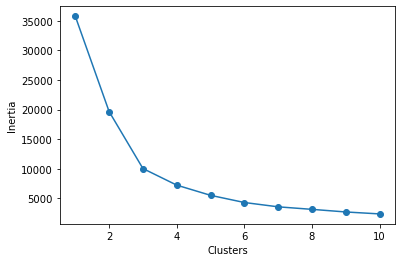

In [99]:
# Elbow Plot
SSE = []
clusters = []
for i in range(1,11): 
    kmeans =  KMeans(init='k-means++', n_clusters = i, random_state = 0)
    kmeans.fit(merged)
    SSE.append(kmeans.inertia_)
    clusters.append(i)
    
plt.plot(clusters,SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [100]:
# optimal cluster chosen is 3
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
kmeans.fit_predict(merged)

array([2, 1, 1, ..., 0, 0, 0])

In [101]:
kmeans.labels_.shape

(2000,)

In [102]:
silhouette_score(data,kmeans.labels_)

0.4127937609652098

In [103]:
calinski_harabasz_score(data, kmeans.labels_)

1505.6158108122443

In [104]:
davies_bouldin_score(data, kmeans.labels_)

0.858855913206258

In [105]:
non_normalised_UK_df

,Porosity,Permeability
0,0.137,0.001
1,0.331,0.360
2,0.264,0.140
3,0.427,2717.000
4,0.135,0.010
...,...,...
1995,0.004,0.040
1996,0.007,0.350
1997,0.022,12.300
1998,0.018,44.000


In [106]:
# For sample dataset permebility prediction and residual model
UK_df_SOM_kmeans_train = UK_df.copy()
UK_df_SOM_kmeans_train['clusters'] = kmeans.labels_
UK_df_SOM_kmeans_train['clusters'] = UK_df_SOM_kmeans_train['clusters'] + 1

# For plotting of charts and statistics overview
UK_df_SOM_kmeans_non_normalised =  non_normalised_UK_df.copy()
UK_df_SOM_kmeans_non_normalised['clusters'] = kmeans.labels_
UK_df_SOM_kmeans_non_normalised['clusters'] = UK_df_SOM_kmeans_non_normalised['clusters'] + 1

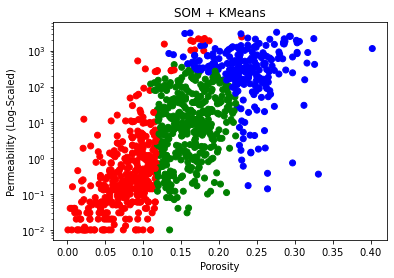

In [107]:
# Plot porosity vs log-scaled permeability scatterplot 
UK_df_SOM_kmeans_non_normalised['c'] = UK_df_SOM_kmeans_non_normalised.clusters.map({1:'r', 2:'b',3:'g', 4:'m', 5:'y', 6:'k'})

temp_UK_df_SOM_kmeans = UK_df_SOM_kmeans_non_normalised.copy()
temp_UK_df_SOM_kmeans = temp_UK_df_SOM_kmeans.sample(n=1000,random_state=0)

plt.yscale('log')
plt.scatter(x=temp_UK_df_SOM_kmeans['Porosity'],y=temp_UK_df_SOM_kmeans['Permeability'],c=temp_UK_df_SOM_kmeans['c'])
plt.title('SOM + KMeans')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

In [108]:
#The means of each cluster
UK_df_SOM_kmeans_non_normalised = UK_df_SOM_kmeans_non_normalised.groupby(by='clusters').mean()

In [109]:
UK_df_SOM_kmeans_non_normalised.round(3) 

,Porosity,Permeability
clusters,,
1,0.079,50.100
2,0.234,550.760
3,0.161,34.684


In [110]:
# Segregation of data by clusters for equation/line fitting
SOM_kmeans_cluster_1 = UK_df_SOM_kmeans_train[UK_df_SOM_kmeans_train['clusters'] == 1]
SOM_kmeans_cluster_2 = UK_df_SOM_kmeans_train[UK_df_SOM_kmeans_train['clusters'] == 2]
SOM_kmeans_cluster_3 = UK_df_SOM_kmeans_train[UK_df_SOM_kmeans_train['clusters'] == 3]

# Select only the relevant columns
SOM_kmeans_cluster_1 = SOM_kmeans_cluster_1[['Porosity','Permeability']]
SOM_kmeans_cluster_2 = SOM_kmeans_cluster_2[['Porosity','Permeability']]
SOM_kmeans_cluster_3 = SOM_kmeans_cluster_3[['Porosity','Permeability']]

# Fit a Linear regression line for each cluster
SOM_kmeans_cluster_1_x = SOM_kmeans_cluster_1['Porosity'].values.reshape(-1,1)
SOM_kmeans_cluster_1_y = SOM_kmeans_cluster_1['Permeability'].values.reshape(-1,1)
SOM_kmeans_cluster_1_lr = LinearRegression().fit(SOM_kmeans_cluster_1_x,SOM_kmeans_cluster_1_y)

SOM_kmeans_cluster_2_x = SOM_kmeans_cluster_2['Porosity'].values.reshape(-1,1)
SOM_kmeans_cluster_2_y = SOM_kmeans_cluster_2['Permeability'].values.reshape(-1,1)
SOM_kmeans_cluster_2_lr = LinearRegression().fit(SOM_kmeans_cluster_2_x,SOM_kmeans_cluster_2_y)

SOM_kmeans_cluster_3_x = SOM_kmeans_cluster_3['Porosity'].values.reshape(-1,1)
SOM_kmeans_cluster_3_y = SOM_kmeans_cluster_3['Permeability'].values.reshape(-1,1)
SOM_kmeans_cluster_3_lr = LinearRegression().fit(SOM_kmeans_cluster_3_x,SOM_kmeans_cluster_3_y)

In [111]:
# copy sample set for testing
UK_df_sample_set_SOM_kmeans = UK_df_sample_set.copy()

In [112]:
# Predict winner neurons coordinates for all 50 samples
test_data = UK_df_sample_set_SOM_kmeans.values
som.winner(test_data[0])

# Compile coordinates
for i in range(len(test_data)):
    if i == 0:
        merged = pd.DataFrame([[som.winner(data[0])[0],som.winner(data[0])[1]]],columns = ['axis_a','axis_b'])
    else: 
        df2 = pd.DataFrame([[som.winner(data[i])[0],som.winner(data[i])[1]]],columns = ['axis_a','axis_b'])
        merged = pd.concat([merged,df2],ignore_index=True)
        
# Predict cluster using model and tag to dataset 
predicted_cluster = kmeans.predict(merged)
UK_df_sample_set_SOM_kmeans['Predicted Cluster'] = predicted_cluster+1

In [113]:
# predict permeability
for one_sample in range(len(UK_df_sample_set_SOM_kmeans)):
    if(UK_df_sample_set_SOM_kmeans.loc[one_sample]['Predicted Cluster'] == 1):
        predicted_permeability = kmeans_cluster_1_lr.predict(UK_df_sample_set_SOM_kmeans.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_SOM_kmeans.loc[one_sample]['Predicted Cluster'] == 2):
        predicted_permeability = kmeans_cluster_2_lr.predict(UK_df_sample_set_SOM_kmeans.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_SOM_kmeans.loc[one_sample]['Predicted Cluster'] == 3):
        predicted_permeability = kmeans_cluster_3_lr.predict(UK_df_sample_set_SOM_kmeans.loc[one_sample]['Porosity'].reshape(-1,1))
    UK_df_sample_set_SOM_kmeans.loc[one_sample,'Predicted Permeability'] = float(predicted_permeability)

In [114]:
# Residual Calculation
UK_df_sample_set_SOM_kmeans['Residuals'] = UK_df_sample_set_SOM_kmeans['Permeability'] - UK_df_sample_set_SOM_kmeans['Predicted Permeability']

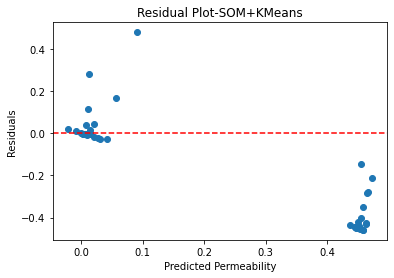

In [115]:
# plot residual plot
plt.scatter(y=UK_df_sample_set_SOM_kmeans['Residuals'],x=UK_df_sample_set_SOM_kmeans['Predicted Permeability'])
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Plot-SOM+KMeans')
plt.xlabel('Predicted Permeability')
plt.ylabel('Residuals')
plt.show()

# DBSCAN

In [116]:
UK_df

,Porosity,Permeability
0,0.318605,2.915452e-07
1,0.769767,1.049563e-04
2,0.613953,4.081633e-05
3,0.993023,7.921283e-01
4,0.313953,2.915452e-06
...,...,...
1995,0.009302,1.166181e-05
1996,0.016279,1.020408e-04
1997,0.051163,3.586006e-03
1998,0.041860,1.282799e-02


Find Optimal Cluster using Nearest Neighbor to find average distances of a fixed K, which in this case is randomly set to 5

In [117]:
nneighbor = NearestNeighbors(n_neighbors=4)
nneighbor.fit(UK_df)

NearestNeighbors(n_neighbors=4)

In [118]:
dist, i = nneighbor.kneighbors(UK_df)

In [119]:
dist

array([[0.00000000e+00, 3.76093294e-05, 4.05247813e-05, 5.21865889e-05],
       [0.00000000e+00, 4.50231106e-02, 6.15216630e-02, 7.90698451e-02],
       [0.00000000e+00, 6.99708455e-05, 4.65204081e-03, 6.99623495e-03],
       ...,
       [0.00000000e+00, 3.56559767e-03, 3.82122718e-03, 4.21311496e-03],
       [0.00000000e+00, 1.27580175e-02, 1.28221574e-02, 1.28250729e-02],
       [0.00000000e+00, 6.97674967e-03, 1.16279070e-02, 1.16279103e-02]])

In [120]:
dist= np.sort(dist[:,3],axis=0)

Text(0, 0.5, 'Dist')

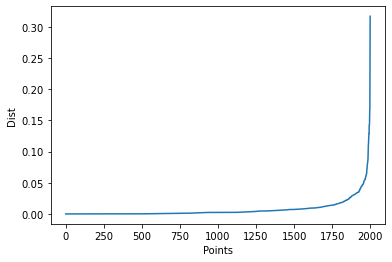

In [121]:
plt.plot(dist)
plt.xlabel('Points')
plt.ylabel('Dist')

In [122]:
i = np.arange(len(dist))
knee = KneeLocator(i,dist, S=1,curve='convex',direction = 'increasing', interp_method='polynomial' )

0.0152


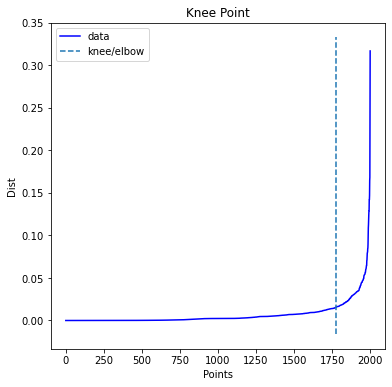

In [123]:
knee.plot_knee()
plt.xlabel('Points')
plt.ylabel('Dist')

print(round(dist[knee.knee],4))

In [124]:
# initalise and train model
dbscan = DBSCAN(eps=0.0152,min_samples=25)
dbscan.fit(UK_df) 

DBSCAN(eps=0.0152, min_samples=25)

In [125]:
silhouette_score(UK_df,dbscan.labels_)

0.4040751884729474

In [126]:
calinski_harabasz_score(UK_df, dbscan.labels_)

1180.6135989600189

In [127]:
davies_bouldin_score(UK_df, dbscan.labels_)

1.0411946893559354

In [128]:
# For sample dataset permebility prediction and residual model
UK_df_dbscan_train = UK_df.copy()
UK_df_dbscan_train['clusters'] = dbscan.labels_
UK_df_dbscan_train['clusters'] = UK_df_dbscan_train['clusters'] + 1

# For plotting of charts and statistics overview
UK_df_dbscan_non_normalised =  non_normalised_UK_df.copy()
UK_df_dbscan_non_normalised['clusters'] = dbscan.labels_
UK_df_dbscan_non_normalised['clusters'] = UK_df_dbscan_non_normalised['clusters'] + 1

# prediction usuage
UK_df_dbscan_non_normalised_1 =  non_normalised_UK_df.copy()
UK_df_dbscan_non_normalised_1['clusters'] = dbscan.labels_
UK_df_dbscan_non_normalised_1['clusters'] = UK_df_dbscan_non_normalised_1['clusters'] + 1

In [129]:
dbscan.labels_

array([ 0, -1, -1, ...,  0,  0, -1], dtype=int64)

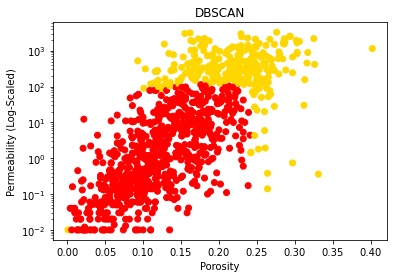

In [130]:
# Plot porosity vs log-scaled permeability scatterplot 
UK_df_dbscan_non_normalised['c'] = UK_df_dbscan_non_normalised.clusters.map({0:'gold',1:'r', 2:'b',3:'g', 4:'m', 5:'y', 6:'k'})

temp_UK_df_dbscan = UK_df_dbscan_non_normalised.copy()
temp_UK_df_dbscan = temp_UK_df_dbscan.sample(n=1000,random_state=0)

plt.yscale('log')
plt.scatter(x=temp_UK_df_dbscan['Porosity'],y=temp_UK_df_dbscan['Permeability'],c=temp_UK_df_dbscan['c'])
plt.title('DBSCAN')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

In [131]:
#The means of each cluster
UK_df_dbscan_non_normalised = UK_df_dbscan_non_normalised.groupby(by='clusters').mean()
#UK_df_dbscan = UK_df_dbscan.iloc[1:] # remove cluster 0 as it is noise

In [132]:
UK_df_dbscan_non_normalised.round(3)

,Porosity,Permeability
clusters,,
0,0.215,549.689
1,0.122,10.720


In [133]:
# Segregation of data by clusters for equation/line fitting
DBSCAN_cluster_0 = UK_df_dbscan_train[UK_df_dbscan_train['clusters'] == 0]
DBSCAN_cluster_1 = UK_df_dbscan_train[UK_df_dbscan_train['clusters'] == 1]

# Select only the relevant columns
DBSCAN_cluster_0 = DBSCAN_cluster_0[['Porosity','Permeability']]
DBSCAN_cluster_1 = DBSCAN_cluster_1[['Porosity','Permeability']]

# Fit a Linear regression line for each cluster
DBSCAN_cluster_0_x = DBSCAN_cluster_0['Porosity'].values.reshape(-1,1)
DBSCAN_cluster_0_y = DBSCAN_cluster_0['Permeability'].values.reshape(-1,1)
DBSCAN_cluster_0_lr = LinearRegression().fit(DBSCAN_cluster_0_x,DBSCAN_cluster_0_y)

DBSCAN_cluster_1_x = DBSCAN_cluster_1['Porosity'].values.reshape(-1,1)
DBSCAN_cluster_1_y = DBSCAN_cluster_1['Permeability'].values.reshape(-1,1)
DBSCAN_cluster_1_lr = LinearRegression().fit(DBSCAN_cluster_1_x,DBSCAN_cluster_1_y)

In [134]:
# copy sample set for testing
UK_df_sample_set_DBSCAN = UK_df_sample_set.copy()

In [135]:
# Creating a function to predict new samples clusters
def DBSCAN_prediction(model, new_data, metric = 'euclidean'):
    # by default all points are noise, goal is to iterate and tag them to the nearest data and retrieve the cluster label
    for i, one_data in enumerate(new_data.values):# enumerate sample data
        for j, one_core in enumerate(UK_df_dbscan_non_normalised_1.values): # enumerate trained data with labels
            if np.linalg.norm(one_data - one_core[:2]) < model.eps:
                new_data.loc[i,'Predicted Cluster'] = UK_df_dbscan_non_normalised_1.loc[j,'clusters']
                break
            else:
                new_data.loc[i,'Predicted Cluster'] = 0
    return new_data

In [136]:
# Predicting which cluster new points belong to
DBSCAN_prediction(dbscan,UK_df_sample_set_DBSCAN)

,Porosity,Permeability,Predicted Cluster
0,0.448837,0.000933,0.0
1,0.453488,0.014286,0.0
2,0.123256,0.000087,1.0
3,0.390698,0.001633,0.0
4,0.381395,0.052478,0.0
5,0.376744,0.006006,0.0
6,0.274419,0.005539,0.0
7,0.704651,0.262391,0.0
8,0.283721,0.029155,0.0
9,0.339535,0.000012,0.0


In [137]:
# Change data type from float to int for cluster column 
UK_df_sample_set_DBSCAN = UK_df_sample_set_DBSCAN.astype({'Predicted Cluster':'int'})

In [138]:
# predict permeability
for one_sample in range(len(UK_df_sample_set_DBSCAN)):
    if(UK_df_sample_set_DBSCAN.loc[one_sample]['Predicted Cluster'] == 0):
        predicted_permeability = DBSCAN_cluster_0_lr.predict(UK_df_sample_set_DBSCAN.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_DBSCAN.loc[one_sample]['Predicted Cluster'] == 1):
        predicted_permeability = DBSCAN_cluster_1_lr.predict(UK_df_sample_set_DBSCAN.loc[one_sample]['Porosity'].reshape(-1,1))
    UK_df_sample_set_DBSCAN.loc[one_sample,'Predicted Permeability'] = float(predicted_permeability)

In [139]:
# Residual Calculation
UK_df_sample_set_DBSCAN['Residuals'] = UK_df_sample_set_DBSCAN['Permeability'] - UK_df_sample_set_DBSCAN['Predicted Permeability']

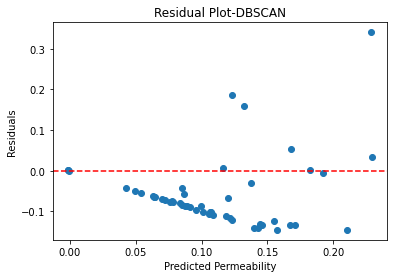

In [140]:
# plot residual plot
plt.scatter(y=UK_df_sample_set_DBSCAN['Residuals'],x=UK_df_sample_set_DBSCAN['Predicted Permeability'])
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Plot-DBSCAN')
plt.xlabel('Predicted Permeability')
plt.ylabel('Residuals')
plt.show()

# BIRCH

In [141]:
# Trial and erorr to optimize parameters based on metrics
#bf = 8, 0.08 and 3 cluster
# Birch(branching_factor=20,threshold = 0.2043, n_clusters = 3)
# Birch(branching_factor=10,threshold = 0.21, n_clusters = 4)
birch = Birch(branching_factor=10,threshold = 0.21, n_clusters = 4)

In [142]:
birch.fit_predict(UK_df)

array([2, 0, 3, ..., 2, 2, 2], dtype=int64)

In [143]:
silhouette_score(UK_df,birch.labels_)

0.47429576429442044

In [144]:
calinski_harabasz_score(UK_df, birch.labels_)

2170.326094044879

In [145]:
davies_bouldin_score(UK_df, birch.labels_)

0.8358548507650757

In [146]:
# For sample dataset permebility prediction and residual model
UK_df_birch_train = UK_df.copy()
UK_df_birch_train['clusters'] = birch.labels_
UK_df_birch_train['clusters'] = UK_df_birch_train['clusters'] + 1

# For plotting of charts and statistics overview
UK_df_birch_non_normalised =  non_normalised_UK_df.copy()
UK_df_birch_non_normalised['clusters'] = birch.labels_
UK_df_birch_non_normalised['clusters'] = UK_df_birch_non_normalised['clusters'] + 1

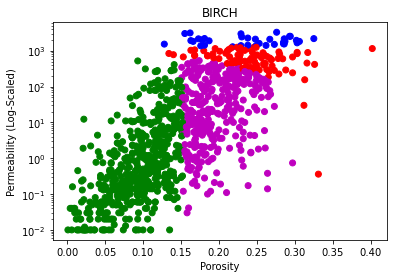

In [147]:
# Plot porosity vs log-scaled permeability scatterplot 
UK_df_birch_non_normalised['c'] = UK_df_birch_non_normalised.clusters.map({1:'r', 2:'b',3:'g', 4:'m', 5:'y', 6:'k'})

temp_UK_df_birch = UK_df_birch_non_normalised.copy()
temp_UK_df_birch= temp_UK_df_birch.sample(n=1000,random_state=0)

plt.yscale('log')
plt.scatter(x=temp_UK_df_birch['Porosity'],y=temp_UK_df_birch['Permeability'],c=temp_UK_df_birch['c'])
plt.title('BIRCH')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

In [148]:
#The means of each cluster
UK_df_birch_non_normalised = UK_df_birch_non_normalised.groupby(by='clusters').mean()

In [149]:
UK_df_birch_non_normalised.round(3)

,Porosity,Permeability
clusters,,
1,0.238,620.094
2,0.244,1928.485
3,0.095,16.812
4,0.196,87.472


In [150]:
# Segregation of data by clusters for equation/line fitting
birch_cluster_1 = UK_df_birch_train[UK_df_birch_train['clusters'] == 1]
birch_cluster_2 = UK_df_birch_train[UK_df_birch_train['clusters'] == 2]
birch_cluster_3 = UK_df_birch_train[UK_df_birch_train['clusters'] == 3]
birch_cluster_4 = UK_df_birch_train[UK_df_birch_train['clusters'] == 4]

# Select only the relevant columns
birch_cluster_1 = birch_cluster_1[['Porosity','Permeability']]
birch_cluster_2 = birch_cluster_2[['Porosity','Permeability']]
birch_cluster_3 = birch_cluster_3[['Porosity','Permeability']]
birch_cluster_4 = birch_cluster_4[['Porosity','Permeability']]

# Fit a Linear regression line for each cluster
birch_cluster_1_x = birch_cluster_1['Porosity'].values.reshape(-1,1)
birch_cluster_1_y = birch_cluster_1['Permeability'].values.reshape(-1,1)
birch_cluster_1_lr = LinearRegression().fit(birch_cluster_1_x,birch_cluster_1_y)

birch_cluster_2_x = birch_cluster_2['Porosity'].values.reshape(-1,1)
birch_cluster_2_y = birch_cluster_2['Permeability'].values.reshape(-1,1)
birch_cluster_2_lr = LinearRegression().fit(birch_cluster_2_x,birch_cluster_2_y)

birch_cluster_3_x = birch_cluster_3['Porosity'].values.reshape(-1,1)
birch_cluster_3_y = birch_cluster_3['Permeability'].values.reshape(-1,1)
birch_cluster_3_lr = LinearRegression().fit(birch_cluster_3_x,birch_cluster_3_y)

birch_cluster_4_x = birch_cluster_4['Porosity'].values.reshape(-1,1)
birch_cluster_4_y = birch_cluster_4['Permeability'].values.reshape(-1,1)
birch_cluster_4_lr = LinearRegression().fit(birch_cluster_4_x,birch_cluster_4_y)

In [151]:
# copy sample set for testing
UK_df_sample_set_birch = UK_df_sample_set.copy()

In [152]:
# Predict clusters of sample set and tag cluster back to testing set
predicted_cluster = birch.predict(UK_df_sample_set_birch)
UK_df_sample_set_birch['Predicted Cluster'] = predicted_cluster+1

In [153]:
# predict permeabilty
for one_sample in range(len(UK_df_sample_set_birch)):
    if(UK_df_sample_set_birch.loc[one_sample]['Predicted Cluster'] == 1):
        predicted_permeability = birch_cluster_1_lr.predict(UK_df_sample_set_birch.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_birch.loc[one_sample]['Predicted Cluster'] == 2):
        predicted_permeability = birch_cluster_2_lr.predict(UK_df_sample_set_birch.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_birch.loc[one_sample]['Predicted Cluster'] == 3):
        predicted_permeability = birch_cluster_3_lr.predict(UK_df_sample_set_birch.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_birch.loc[one_sample]['Predicted Cluster'] == 4):
        predicted_permeability = birch_cluster_4_lr.predict(UK_df_sample_set_birch.loc[one_sample]['Porosity'].reshape(-1,1))
    UK_df_sample_set_birch.loc[one_sample,'Predicted Permeability'] = float(predicted_permeability)

In [154]:
# Residual Calculation
UK_df_sample_set_birch['Residuals'] = UK_df_sample_set_birch['Permeability'] - UK_df_sample_set_birch['Predicted Permeability']

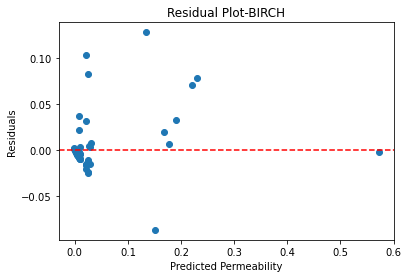

In [155]:
# plot residual plot
plt.scatter(y=UK_df_sample_set_birch['Residuals'],x=UK_df_sample_set_birch['Predicted Permeability'])
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Plot-BIRCH')
plt.xlabel('Predicted Permeability')
plt.ylabel('Residuals')
plt.show()

# Gaussian Mixture Model

Text(0, 0.5, 'bic')

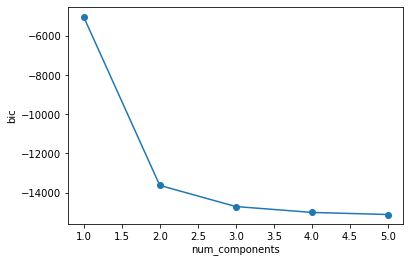

In [156]:
# using bic criterion to determine number of components
num_components = []
bic = []
for i in range(1,6):
    gmm = GaussianMixture(n_components=i, init_params = 'kmeans' ,random_state=0)
    gmm.fit(UK_df)
    bic.append(gmm.bic(UK_df))
    num_components.append(i)

plt.plot(num_components,bic, marker='o')
plt.xlabel('num_components')
plt.ylabel('bic')

In [157]:
# compoents of 3 is used based on simple BIC criterion evaluation with full covariance
gmm = GaussianMixture(n_components=3, init_params = 'kmeans' ,random_state=0)

In [158]:
gmm.fit(UK_df)
gmm_label_ =gmm.predict(UK_df)

In [159]:
silhouette_score(UK_df,gmm_label_)

0.26387640876620505

In [160]:
calinski_harabasz_score(UK_df, gmm_label_)

1090.6219566670773

In [161]:
davies_bouldin_score(UK_df, gmm_label_)

1.0317012168587743

In [162]:
# For sample dataset permebility prediction and residual model
UK_df_gmm_train = UK_df.copy()
UK_df_gmm_train['clusters'] = gmm_label_
UK_df_gmm_train['clusters'] = UK_df_gmm_train['clusters'] + 1

# For plotting of charts and statistics overview
UK_df_gmm_non_normalised =  non_normalised_UK_df.copy()
UK_df_gmm_non_normalised['clusters'] = gmm_label_
UK_df_gmm_non_normalised['clusters'] = UK_df_gmm_non_normalised['clusters'] + 1

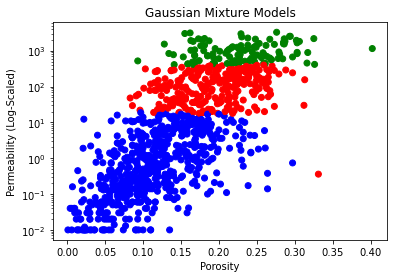

In [163]:
# Plot porosity vs log-scaled permeability scatterplot 
UK_df_gmm_non_normalised['c'] = UK_df_gmm_non_normalised.clusters.map({1:'r', 2:'b',3:'g', 4:'m', 5:'y', 6:'k'})

temp_UK_df_gmm = UK_df_gmm_non_normalised.copy()
temp_UK_df_gmm = temp_UK_df_gmm.sample(n=1000,random_state=0)

plt.yscale('log')
plt.scatter(x=temp_UK_df_gmm['Porosity'],y=temp_UK_df_gmm['Permeability'],c=temp_UK_df_gmm['c'])
plt.title('Gaussian Mixture Models')
plt.xlabel('Porosity')
plt.ylabel('Permeability (Log-Scaled)')
plt.show()

In [164]:
#The means of each cluster
UK_df_gmm_non_normalised = UK_df_gmm_non_normalised.groupby(by='clusters').mean()

In [165]:
UK_df_gmm_non_normalised.round(3)

,Porosity,Permeability
clusters,,
1,0.192,138.307
2,0.113,2.424
3,0.227,1087.203


In [166]:
# Segregation of data by clusters for equation/line fitting
gmm_cluster_1 = UK_df_gmm_train[UK_df_gmm_train['clusters'] == 1]
gmm_cluster_2 = UK_df_gmm_train[UK_df_gmm_train['clusters'] == 2]
gmm_cluster_3 = UK_df_gmm_train[UK_df_gmm_train['clusters'] == 3]

# Select only the relevant columns
gmm_cluster_1 = gmm_cluster_1[['Porosity','Permeability']]
gmm_cluster_2 = gmm_cluster_2[['Porosity','Permeability']]
gmm_cluster_3 = gmm_cluster_3[['Porosity','Permeability']]

# Fit a Linear regression line for each cluster
gmm_cluster_1_x = gmm_cluster_1['Porosity'].values.reshape(-1,1)
gmm_cluster_1_y = gmm_cluster_1['Permeability'].values.reshape(-1,1)
gmm_cluster_1_lr = LinearRegression().fit(gmm_cluster_1_x,gmm_cluster_1_y)

gmm_cluster_2_x = gmm_cluster_2['Porosity'].values.reshape(-1,1)
gmm_cluster_2_y = gmm_cluster_2['Permeability'].values.reshape(-1,1)
gmm_cluster_2_lr = LinearRegression().fit(gmm_cluster_2_x,gmm_cluster_2_y)

gmm_cluster_3_x = gmm_cluster_3['Porosity'].values.reshape(-1,1)
gmm_cluster_3_y = gmm_cluster_3['Permeability'].values.reshape(-1,1)
gmm_cluster_3_lr = LinearRegression().fit(gmm_cluster_3_x,gmm_cluster_3_y)

In [167]:
# copy sample set for testing
UK_df_sample_set_gmm = UK_df_sample_set.copy()

In [168]:
# Predict clusters of sample set and tag cluster back to testing set
predicted_cluster = birch.predict(UK_df_sample_set_gmm)
UK_df_sample_set_gmm['Predicted Cluster'] = predicted_cluster+1

In [169]:
# predict permeability
for one_sample in range(len(UK_df_sample_set_gmm)):
    if(UK_df_sample_set_gmm.loc[one_sample]['Predicted Cluster'] == 1):
        predicted_permeability = gmm_cluster_1_lr.predict(UK_df_sample_set_gmm.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_gmm.loc[one_sample]['Predicted Cluster'] == 2):
        predicted_permeability = gmm_cluster_2_lr.predict(UK_df_sample_set_gmm.loc[one_sample]['Porosity'].reshape(-1,1))
    if(UK_df_sample_set_gmm.loc[one_sample]['Predicted Cluster'] == 3):
        predicted_permeability = gmm_cluster_3_lr.predict(UK_df_sample_set_gmm.loc[one_sample]['Porosity'].reshape(-1,1))
    UK_df_sample_set_gmm.loc[one_sample,'Predicted Permeability'] = float(predicted_permeability)

In [170]:
# Residual Calculation
UK_df_sample_set_gmm['Residuals'] = UK_df_sample_set_gmm['Permeability'] - UK_df_sample_set_gmm['Predicted Permeability']

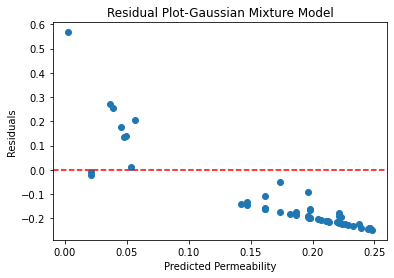

In [171]:
# plot residual plot
plt.scatter(y=UK_df_sample_set_gmm['Residuals'],x=UK_df_sample_set_gmm['Predicted Permeability'])
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Plot-Gaussian Mixture Model')
plt.xlabel('Predicted Permeability')
plt.ylabel('Residuals')
plt.show()